In [32]:
import math
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import copy
np.seterr(all='raise')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [33]:
def cov(x, y):
    #definition of cov(x, y) = E[xy] - E[x]E[y]
    return np.mean(x * y) - np.mean(x) * np.mean(y)

def corr(x, y):
    #corr(x, y) = cov(x, y) / sqrt(var(x) * var(y))
    #var(y) == 0 --> this edge case is checked in the decision tree algorithm
    #var(y) == 0 --> implies very high correlation in that set of data
    #var(x) == 0 --> implies very low correlation in that set of data (hence we return 0 on this)
    if np.var(x) == 0:
        return 0
    return cov(x, y) / math.sqrt(np.var(x) * np.var(y))

def generate_data(size, d):
    x = []
    x.append(np.random.normal(3, 1, size))
    x.append(np.random.normal(-2, 1, size))
    x.append(x[0] + 2 * x[1])
    x.append((x[1] + 2)**2)
    x.append(np.random.binomial(n=1, p=0.8, size=size))
    for _ in range(d - 5):
        x.append(np.random.normal(0, 0.1, size))

    def compute_y(x):
        y = 4 - 3 * x[0] * x[0] + x[2] - 0.01 * x[3] + x[1] * x[4] + np.random.normal(0, 0.1, len(x[0]))
        return y
    
    def transpose(temp):
        temp = np.array(temp)
        return temp.T
    
    xt = transpose(x)
    y = compute_y(x)
    
    return x, xt, y

In [106]:
class DecisionTree():   
    def __init__(self, x, y, d, max_depth, min_sample_size):
        if d == 1:
            print(superfluous)
        self.x = x
        self.y = y
        
        self.max_depth = max_depth
        self.min_sample_size = min_sample_size
        self.depth = d 
        self.child = len(self.x[0]) <= self.min_sample_size or self.depth == self.max_depth or np.var(y) == 0
        
        self.ind = -1
        self.threshold = 0
        
        self.result = np.mean(y)
        self.left, self.right = None, None

        if not self.child:
            self.split()
    
    def find_best_feature(self):
        all_corr = [abs(corr(xi, self.y)) for xi in self.x]
        return np.argmax(all_corr)
    
    def find_threshold_split(self, ind):
        indices = self.x[ind].argsort()
        
        for i in range(len(self.x)):
            self.x[i] = self.x[i][indices]
        self.y = self.y[indices]
        
        threshold = -1
        mn = float('inf')

        for i in range(len(self.y) - 1):
            fltr_left = self.x[ind] <= self.x[ind][i]
            fltr_right = self.x[ind] > self.x[ind][i]
            
            left = np.sum(fltr_left)
            right = np.sum(fltr_right)              
            
            var_left = np.var(self.y[fltr_left])
            var_right = 0 if right == 0 else np.var(self.y[fltr_right]) 

            err_left = left / len(self.y) * var_left
            err_right = right / len(self.y) * var_right
            
            err = err_left + err_right
            
            if err < mn:
                threshold, mn = (self.x[ind][i] + self.x[ind][i + 1]) / 2, err
        return threshold
    
     
    def split(self):
        se
        if self.ind > 4:
            superfluous[self.ind] += 1

        self.threshold = self.find_threshold_split(self.ind)

        fltr_left = self.x[self.ind] <= self.threshold
        fltr_right = self.x[self.ind] > self.threshold
                
        x_left = [arr[fltr_left] for arr in self.x]
        x_right = [arr[fltr_right] for arr in self.x]
            
        y_left = self.y[fltr_left]
        y_right = self.y[fltr_right]
        
        self.left = DecisionTree(x_left, y_left, self.depth + 1, self.max_depth, self.min_sample_size)
        self.right = DecisionTree(x_right, y_right, self.depth + 1, self.max_depth, self.min_sample_size)

    @staticmethod
    def predict(node, arr):
        if node.child:
            return node.result
        if arr[node.ind] <= node.threshold:
            return DecisionTree.predict(node.left, arr)
        else:
            return DecisionTree.predict(node.right, arr)

In [4]:
def compute_mse_dt(x, y, dt):
    err = 0 #error
    for i in range(len(y)):
        yp = DecisionTree.predict(dt, x[i]) #get prediction from decision tree
        err += (abs(yp - y[i]) ** 2) #add squared error
    err = err / len(y) #take mean of squared error
    return err

In [59]:
def question1():
    y = y10
    testy = testy10
    #constant model = the mean of y values (explained in pdf)
    optimal_c = np.mean(y)
    #function that computes the MSE of a given constant model
    def compute_mse_constant_model(y, c):
        err = 0
        for i in range(len(y)):
            err += (c - y[i]) ** 2
        err = err / len(y) #take average of squared sum
        return err
    
    #Find the errors of both training and testing
    training_error = compute_mse_constant_model(y, optimal_c)
    testing_error = compute_mse_constant_model(testy, optimal_c)
    
    #Print
    print('Optimal C: ', optimal_c)
    print('Training Error: ', training_error)
    print('Testing Error: ', testing_error)
  
    return optimal_c, training_error, testing_error

In [60]:
question1()

Optimal C:  -28.533212679883405
Training Error:  316.9608408641263
Testing Error:  327.8508124523598


(-28.533212679883405, 316.9608408641263, 327.8508124523598)

In [72]:
def question2():
    train_errors = []
    test_errors = []
    
    x = x_train10
    y = y10
    
    tx = tx_test10
    testy = testy10
    
    xt = tx_train10
    
    for i in range(1, 30):    
        print('Iteration: ', i)
        #provide copies of the data (we want to use the same dataset on each tree)
        dt = DecisionTree(copy.deepcopy(x), copy.deepcopy(y), 1, i, 1)
        
        #compute errors
        training_err = compute_mse_dt(xt, y, dt)
        test_err = compute_mse_dt(tx, testy, dt)
        
        train_errors.append(training_err)
        test_errors.append(test_err)
    
    #build plot (can be seen in pdf)
    plt.figure(figsize = (6, 10), dpi = 80)
    plt.title('Training/Testing MSE on Decision Tree with varying depth')
    plt.plot(train_errors, '-b', label = 'Train')
    plt.plot(test_errors, '--r', label = 'Test')
    plt.xlabel('Depth')
    plt.ylabel('Training/Testing MSE')
    plt.legend()
    plt.show()
    
    return train_errors, test_errors

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29


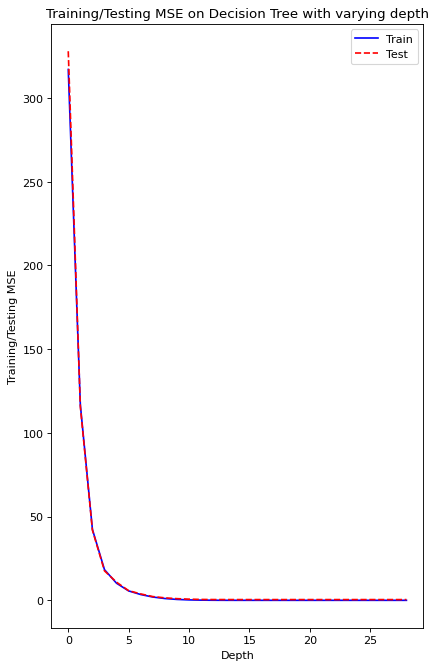

316.9608408641263   327.8508124523598
116.77375547488393   115.66207026487284
42.36475127951115   41.91968593997631
18.301632561637263   17.602661360664868
10.19400592332933   10.801180467540311
5.617318041505871   5.76579717169987
3.45344826674579   3.8220094782070007
1.9687266197671491   2.2359071286072356
1.0776327786282682   1.4711592271735041
0.5388582860795361   0.9897468068344495
0.25050377355723896   0.6979014994086987
0.10865385257161818   0.5278042384625765
0.04433060779949975   0.4638619635501323
0.016135269488133937   0.45109585187851364
0.005284454438529201   0.44734596663113774
0.0015794552740927977   0.44522788487159115
0.000395199032619274   0.443845674114742
6.974724927684455e-05   0.44385202621248454
7.784773524292967e-06   0.44408875167111983
8.936665245430212e-07   0.44400498140472966
1.2304484629633835e-12   0.4439596592084996
0.0   0.4439596592084996
0.0   0.4439596592084996
0.0   0.4439596592084996
0.0   0.4439596592084996
0.0   0.4439596592084996
0.0   0.4439596

In [73]:
train_2, test_2 = question2()
for i in range(len(train_2)):
    print(train_2[i], ' ', test_2[i])

In [78]:
print('Testing Errors for increasing maximum depth: ')
for i in range(len(train_2)):
    print(i + 1, ' ', train_2[i], ' ', test_2[i])

Testing Errors for increasing maximum depth: 
1   316.9608408641263   327.8508124523598
2   116.77375547488393   115.66207026487284
3   42.36475127951115   41.91968593997631
4   18.301632561637263   17.602661360664868
5   10.19400592332933   10.801180467540311
6   5.617318041505871   5.76579717169987
7   3.45344826674579   3.8220094782070007
8   1.9687266197671491   2.2359071286072356
9   1.0776327786282682   1.4711592271735041
10   0.5388582860795361   0.9897468068344495
11   0.25050377355723896   0.6979014994086987
12   0.10865385257161818   0.5278042384625765
13   0.04433060779949975   0.4638619635501323
14   0.016135269488133937   0.45109585187851364
15   0.005284454438529201   0.44734596663113774
16   0.0015794552740927977   0.44522788487159115
17   0.000395199032619274   0.443845674114742
18   6.974724927684455e-05   0.44385202621248454
19   7.784773524292967e-06   0.44408875167111983
20   8.936665245430212e-07   0.44400498140472966
21   1.2304484629633835e-12   0.443959659208499

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29


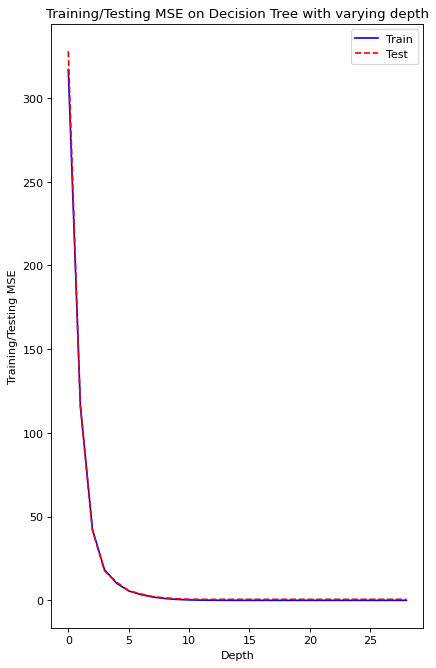

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27


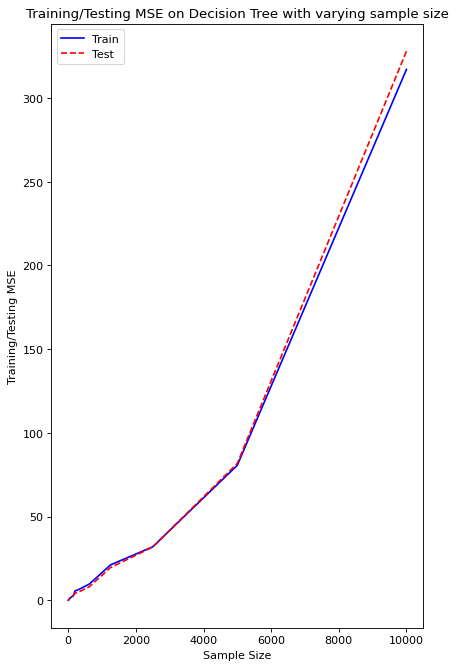

In [75]:
def question5():
    x = x_train50
    y = y50
    
    tx = tx_test50
    testy = testy50
    
    xt = tx_train50

    def question5_depth():
        train_errors = []
        test_errors = []
        
        for i in range(1, 30):    
            print('Iteration: ', i)
            #provide copies of the data (we want to use the same dataset on each tree)
            dt = DecisionTree(copy.deepcopy(x), copy.deepcopy(y), 1, i, 1)
            
            #compute errors
            training_err = compute_mse_dt(xt, y, dt)
            test_err = compute_mse_dt(tx, testy, dt)
            
            train_errors.append(training_err)
            test_errors.append(test_err)
        
        #build plot (can be seen in pdf)
        plt.figure(figsize = (6, 10), dpi = 80)
        plt.title('Training/Testing MSE on Decision Tree with varying depth')
        plt.plot(train_errors, '-b', label = 'Train')
        plt.plot(test_errors, '--r', label = 'Test')
        plt.xlabel('Depth')
        plt.ylabel('Training/Testing MSE')
        plt.legend()
        plt.show()
        
        return train_errors, test_errors

    def question5_sample_size():
        train_errors = []
        test_errors = []
        
        #set of sample sizes that we will build decision trees out of
        #note that these are a set of decreasing and somewhat random numbers (more explanation in pdf)
        sample_sizes = sample_sizes = [10000, 5000, 2500, 1250, 625, 300, 200, 150, 100, 50, 25, 20, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        
        iteration = 0
        for sample_size in sample_sizes: #iterate through each sample size
            #build decision tree with copies of dataset
            dt = DecisionTree(copy.deepcopy(x), copy.deepcopy(y), 1, 30, sample_size)
            iteration += 1
            print('Iteration: ', iteration)
            #compute and store errors
            training_err = compute_mse_dt(xt, y, dt)
            test_err = compute_mse_dt(tx, testy, dt)
            train_errors.append(training_err)
            test_errors.append(test_err)
        
        #build plots
        plt.figure(figsize = (6, 10), dpi=80)
        plt.title('Training/Testing MSE on Decision Tree with varying sample size')
        plt.plot(sample_sizes, train_errors, '-b', label = 'Train')
        plt.plot(sample_sizes, test_errors, '--r', label = 'Test')
        plt.xlabel('Sample Size')
        plt.ylabel('Training/Testing MSE')
        plt.legend()
        plt.show()
        
        return train_errors, test_errors
    
    train_depth, test_depth = question5_depth()
    train_size, test_size = question5_sample_size()
    return train_depth, test_depth, train_size, test_size

train_depth, test_depth, train_size, test_size = question5()

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27


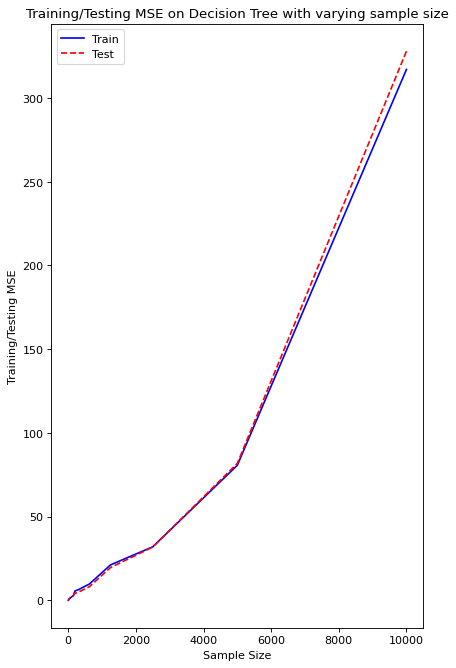

316.9608408641263   327.8508124523598
80.64769017908375   81.75894601269162
31.961880391419598   31.84309544127558
21.14929041132909   19.567111999993518
9.732966250058272   8.128676434549385
6.3492310103585075   4.890940186363673
5.626507877240371   4.168813643847253
2.680953164859119   2.8842046270716732
2.0635777894382046   2.2158829576343986
1.2103675350166756   1.429296250155443
0.48724544663952135   0.7103019288807929
0.39034600185220447   0.5963078942587304
0.3032476226707787   0.4849140612747549
0.2756713815308897   0.47866622278138526
0.25311397104230066   0.4609138519261583
0.2237879230185075   0.45320117543655314
0.19966071003625957   0.43263572353917157
0.173587873585849   0.428633534981996
0.13377456763767248   0.4135540577283883
0.11479469146173649   0.4252220913771773
0.09043660927817611   0.3874590399601913
0.07191434959186309   0.37563018490266514
0.05443858800724401   0.4009819919867448
0.03452170930274354   0.39654438869337094
0.017473960570130672   0.412789623275581

In [74]:
def question3():

    train_errors = []
    test_errors = []
    
    x = x_train10
    y = y10
    
    tx = tx_test10
    testy = testy10
    
    xt = tx_train10
    
    #set of sample sizes that we will build decision trees out of
    #note that these are a set of decreasing and somewhat random numbers (more explanation in pdf)
    sample_sizes = [10000, 5000, 2500, 1250, 625, 300, 200, 150, 100, 50, 25, 20, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
    
    #generate dataset
    #x and y are used for the decision tree
    #xt is transpose of training dataset
    #tx (transpose of test dataset) and testy are a part of testing dataset
    iteration = 0
    for sample_size in sample_sizes: #iterate through each sample size
        #build decision tree with copies of dataset
        iteration += 1
        print('Iteration: ', iteration)
        dt = DecisionTree(copy.deepcopy(x), copy.deepcopy(y), 1, 30, sample_size)
        
        #compute and store errors
        training_err = compute_mse_dt(xt, y, dt)
        test_err = compute_mse_dt(tx, testy, dt)
        train_errors.append(training_err)
        test_errors.append(test_err)
    
    #build plots
    plt.figure(figsize = (6, 10), dpi=80)
    plt.title('Training/Testing MSE on Decision Tree with varying sample size')
    plt.plot(sample_sizes, train_errors, '-b', label = 'Train')
    plt.plot(sample_sizes, test_errors, '--r', label = 'Test')
    plt.xlabel('Sample Size')
    plt.ylabel('Training/Testing MSE')
    plt.legend()
    plt.show()
    
    return train_errors, test_errors
train_3, test_3 = question3()
for i in range(len(train_3)):
    print(train_3[i], ' ', test_3[i])

In [11]:
for i in range(len(train)):
    print(train[i], ' ', test[i])

317.3132236650482   347.88440387643146
83.09375368268236   94.21281827666772
26.616145312222443   29.70921991411963
22.100695311410988   24.733740308874157
9.977454816994921   11.784222824956322
6.288753992960299   8.450457736614503
5.355614177607693   7.59359084493859
3.018624062080678   3.8359552051234855
2.013255282568809   2.8320154763325207
1.2344955184769335   1.917537920674577
0.5126727359179681   0.9482471243462239
0.4102322419656113   0.8390330192269922
0.31723376283269994   0.7318526330670351
0.30293077972499544   0.6996303487471033
0.2781390209255685   0.6579055542248291
0.26504254061081084   0.6417840806047623
0.24733807421480405   0.630558130961831
0.23045031249538928   0.6162869828402697
0.20907832164380544   0.5921537842437654
0.12398087359982445   0.49035721360735113
0.09720834818998716   0.4660130427855551
0.0722793263483294   0.5095373227635251
0.055547090493567854   0.48875628053681164
0.03660243922854682   0.4924127203182494
0.02382206950441954   0.4545620531193703


In [80]:
sample_sizes = [10000, 5000, 2500, 1250, 625, 300, 200, 150, 100, 50, 25, 20, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
print('Testing/Training Error on different sample sizes')
for i in range(len(train_size)):
    print(sample_sizes[i], ' ', train_size[i], ' ', test_size[i])

Testing/Training Error on different sample sizes
10000   316.9608408641263   327.8508124523598
5000   80.64769017908375   81.75894601269162
2500   31.961880391419598   31.84309544127558
1250   21.14929041132909   19.567111999993518
625   9.732966250058272   8.128676434549385
300   6.3492310103585075   4.890940186363673
200   5.626507877240371   4.168813643847253
150   2.680953164859119   2.8842046270716732
100   2.0635777894382046   2.2158829576343986
50   1.2103675350166756   1.429296250155443
25   0.4874306597645412   0.711508074777081
20   0.3905286671847874   0.603424247948223
15   0.3023087932276454   0.5169083358236971
14   0.27383909904488185   0.515441125161942
13   0.25177075880709715   0.4998943716184985
12   0.22090254764686984   0.5040136678756877
11   0.19682440103698753   0.5019431864325975
10   0.17551904194980125   0.4984347879003914
9   0.13163806177461837   0.49140997297360633
8   0.11104783250053755   0.5215930079427815
7   0.08321824460384293   0.5307383300968601
6 

In [79]:
print('Testing/Training Error on different depth')
for i in range(len(train_depth)):
    print(i + 1, ' ', train_depth[i], ' ', test_depth[i])

Testing/Training Error on different depth
1   316.9608408641263   327.8508124523598
2   116.77375547488393   115.66207026487284
3   42.36475127951115   41.91968593997631
4   18.301632561637263   17.602661360664868
5   10.19400592332933   10.801180467540311
6   5.617318041505871   5.76579717169987
7   3.45344826674579   3.8220094782070007
8   1.9684274090179104   2.2359071286072356
9   1.075067626275039   1.4711316297934909
10   0.536364351073642   0.9342404422134372
11   0.24868951839817874   0.6836020936518177
12   0.10522713198941014   0.5846356692323268
13   0.04160980442573921   0.5653284165383163
14   0.014227174982224   0.5832441136530899
15   0.004075581781068561   0.5883510932593724
16   0.0009515536818286948   0.5924676000939841
17   0.0001652857422564806   0.5939564581568467
18   2.596452691906264e-05   0.5943924586330853
19   2.9175280917898916e-06   0.5947443084674715
20   2.8930251247767135e-07   0.5947952668554597
21   4.043174164085218e-08   0.5948021008733058
22   6.876

In [54]:
x_train50, tx_train50, y50 = generate_data(10000, 50)
x_test50, tx_test50, testy50 = generate_data(1000, 50)

In [56]:
x_train10 = x_train50[0:10]
x_test10 = x_test50[0:10]
def transpose(temp):
    temp = np.array(temp)
    return temp.T

tx_train10 = transpose(x_train10)
tx_test10 = transpose(x_test10)
y10 = y50
testy10 = testy50

In [66]:
len(x_train10)

10

In [68]:
len(tx_train10[0])

10

In [69]:
tx_train10

array([[ 2.50967214e+00, -1.98170084e+00, -1.45372955e+00, ...,
         7.76461205e-02, -4.35278038e-02, -3.44181270e-02],
       [ 1.99454912e+00, -1.98467375e+00, -1.97479838e+00, ...,
         1.75184095e-03, -6.15945209e-02,  8.54275251e-02],
       [ 3.84856820e+00, -2.38127523e+00, -9.13982269e-01, ...,
         3.43098666e-02,  1.30678149e-01,  1.31293912e-01],
       ...,
       [ 3.17230783e+00, -2.13420211e+00, -1.09609639e+00, ...,
         1.55360602e-01,  5.83942086e-02, -2.90143471e-02],
       [ 3.41266284e+00, -2.68333542e+00, -1.95400799e+00, ...,
         1.30632584e-01,  8.17604259e-02,  5.57163985e-04],
       [ 2.19201317e+00, -3.40704009e+00, -4.62206701e+00, ...,
        -6.21483419e-03,  2.26876859e-02,  1.70278494e-02]])

In [70]:
tx_train10.T

array([[ 2.50967214e+00,  1.99454912e+00,  3.84856820e+00, ...,
         3.17230783e+00,  3.41266284e+00,  2.19201317e+00],
       [-1.98170084e+00, -1.98467375e+00, -2.38127523e+00, ...,
        -2.13420211e+00, -2.68333542e+00, -3.40704009e+00],
       [-1.45372955e+00, -1.97479838e+00, -9.13982269e-01, ...,
        -1.09609639e+00, -1.95400799e+00, -4.62206701e+00],
       ...,
       [ 7.76461205e-02,  1.75184095e-03,  3.43098666e-02, ...,
         1.55360602e-01,  1.30632584e-01, -6.21483419e-03],
       [-4.35278038e-02, -6.15945209e-02,  1.30678149e-01, ...,
         5.83942086e-02,  8.17604259e-02,  2.26876859e-02],
       [-3.44181270e-02,  8.54275251e-02,  1.31293912e-01, ...,
        -2.90143471e-02,  5.57163985e-04,  1.70278494e-02]])

In [71]:
tx_train10.shape

(10000, 10)

In [81]:
x_train10

[array([2.50967214, 1.99454912, 3.8485682 , ..., 3.17230783, 3.41266284,
        2.19201317]),
 array([-1.98170084, -1.98467375, -2.38127523, ..., -2.13420211,
        -2.68333542, -3.40704009]),
 array([-1.45372955, -1.97479838, -0.91398227, ..., -1.09609639,
        -1.95400799, -4.62206701]),
 array([3.34859077e-04, 2.34893939e-04, 1.45370803e-01, ...,
        1.80102072e-02, 4.66947294e-01, 1.97976180e+00]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([ 0.01609807, -0.00767868, -0.14272354, ...,  0.22147784,
         0.11132392,  0.113467  ]),
 array([-0.15014972, -0.02936114, -0.13187413, ..., -0.09220334,
         0.00790763, -0.18770291]),
 array([ 0.07764612,  0.00175184,  0.03430987, ...,  0.1553606 ,
         0.13063258, -0.00621483]),
 array([-0.0435278 , -0.06159452,  0.13067815, ...,  0.05839421,
         0.08176043,  0.02268769]),
 array([-0.03441813,  0.08542753,  0.13129391, ..., -0.02901435,
         0.00055716,  0.01702785])]

In [113]:
superfluous = defaultdict(int)
iteration = 0
for i in range(30, 50):
    x, _, y = generate_data(10000, i)
    print('Number of features: ', i)
    dt = DecisionTree(copy.deepcopy(x), copy.deepcopy(y), 1, 15, 6)
    print(superfluous)
    superfluous.clear()

Number of features:  30
defaultdict(<class 'int'>, {})


AttributeError: 'collections.defaultdict' object has no attribute 'add'